Avacado-ruit consumed by people heavily in the United States.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Task is to make a mode that can consider the data provided and predict the Average Price.

In [26]:
#importing all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [77]:
#uploading dataset
ds=pd.read_csv("avocado.csv")
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [78]:
#droped unnamed column becaused this is not proving any information 
ds.drop("Unnamed: 0", inplace=True,axis=1)

# Dataset basic details analysis (Null Value,data type, shape etc )

In [29]:
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [30]:
ds.shape

(18249, 13)

observations: there are 18249 rows and 13 columns

In [31]:
ds.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [32]:
ds.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

observations: there are 3 object values abd one int value and remains are float

<AxesSubplot:>

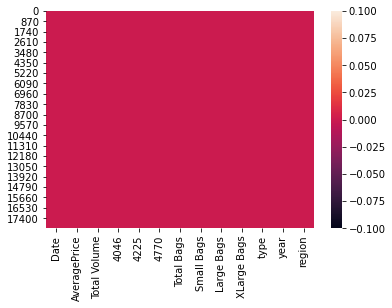

In [33]:
#checking again null value using heatmap
sns.heatmap(ds.isnull())

# Stastical analysis of dataset

In [34]:
ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# EDA using Data Visualisations

# (i) Univariate Analysis

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

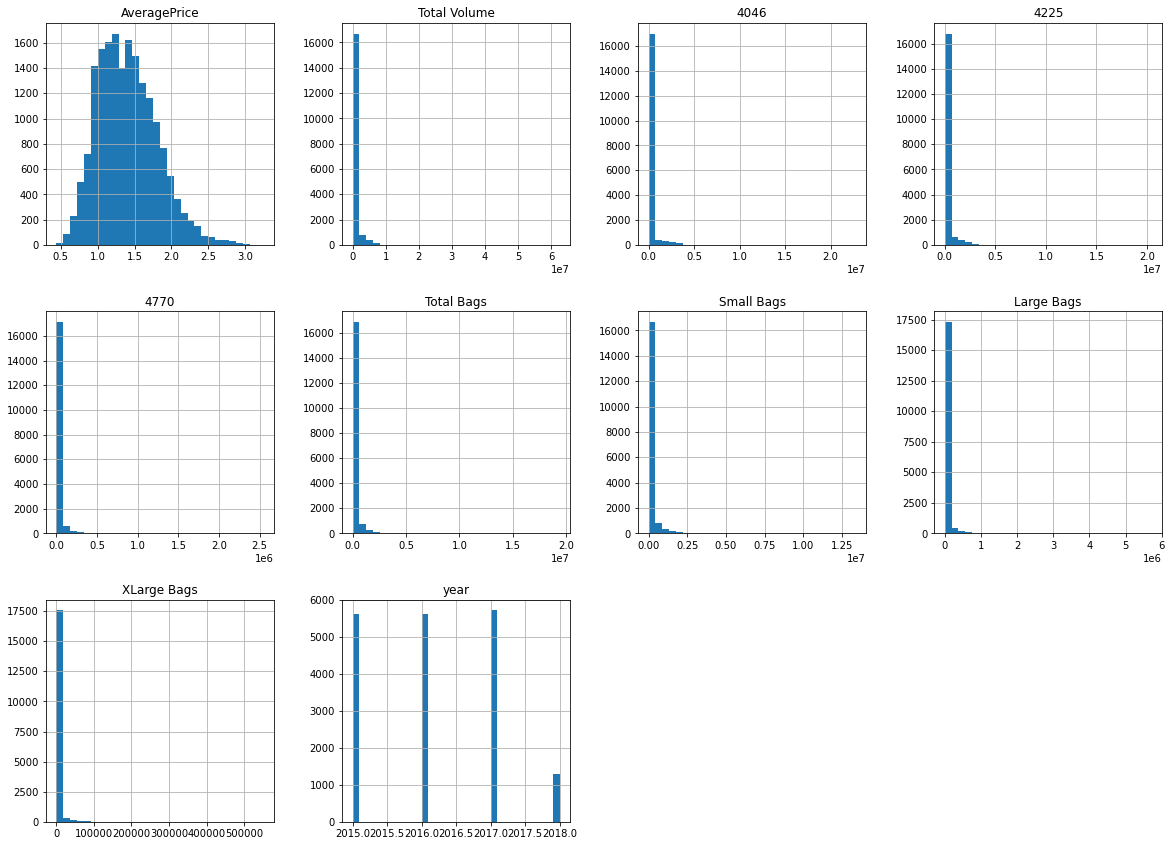

In [35]:
#hisplot 
ds.hist(figsize=(20,20), grid = True, layout = (4,4), bins= 30)

observations: hisplot of most of the graphs are similar

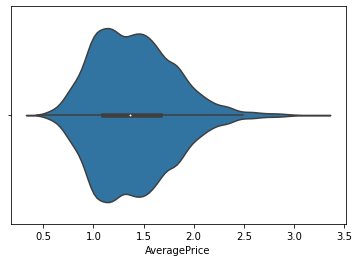

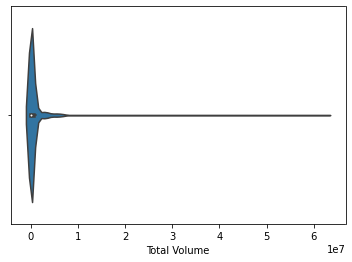

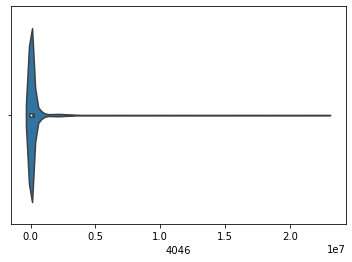

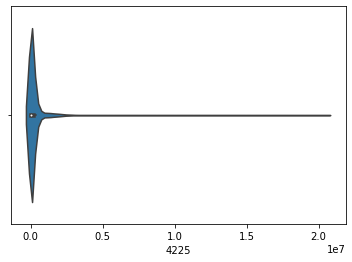

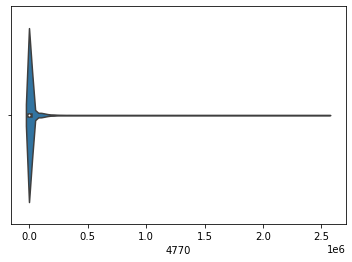

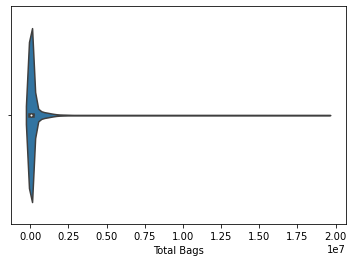

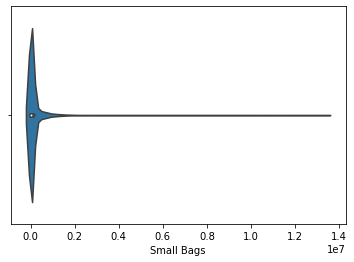

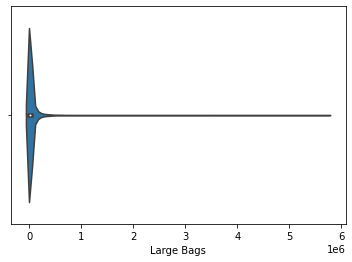

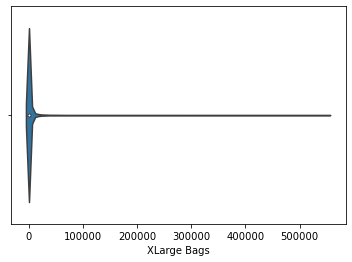

In [36]:
#using the below code creating violinplot.
columns = [ 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
       ]

for i in ds[columns]:
    plt.figure()
    sns.violinplot(ds[i], data=ds)

observations: density of Avarageprice distributed near the center.

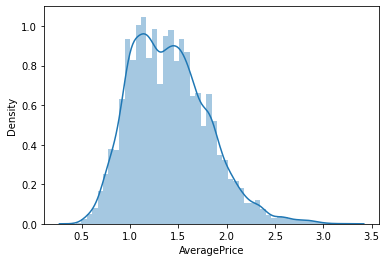

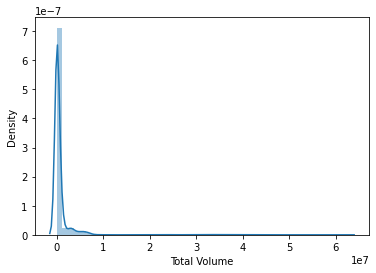

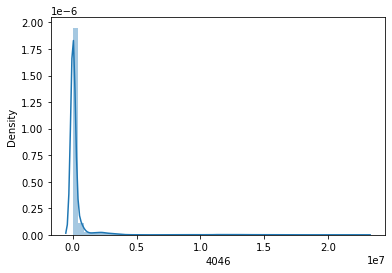

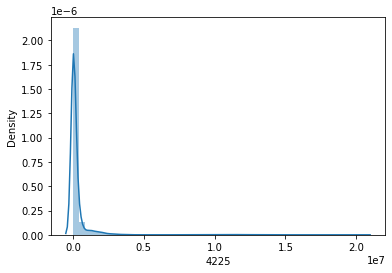

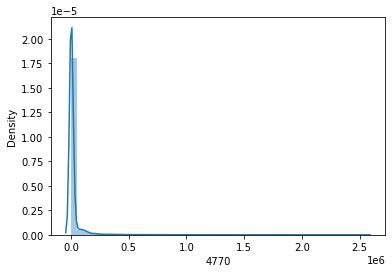

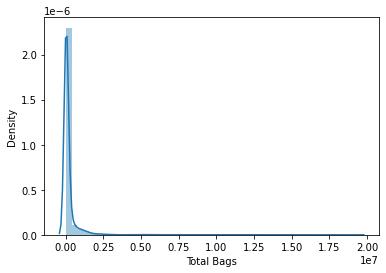

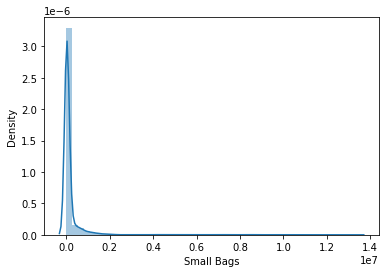

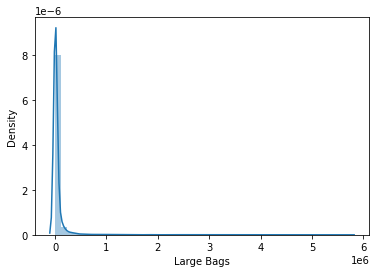

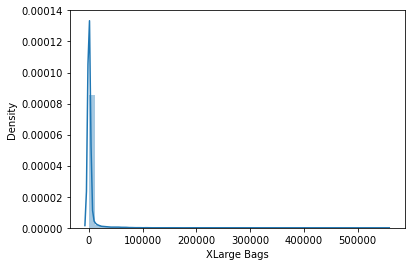

In [37]:
#using the below code creating distplot.
for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i],kde=True)

Observation: High skewed dataset in most of the parameters

# (ii) Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

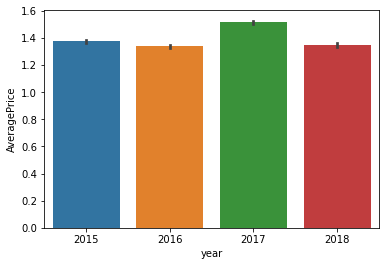

In [38]:
#barchart
sns.barplot(x="year", y="AveragePrice", data=ds)

Observation: avarage price was high in 2017

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

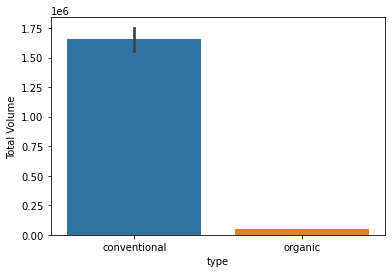

In [39]:
sns.barplot(x="type", y="Total Volume", data=ds)

Observation: there is very less organic type compare to convention type

<AxesSubplot:xlabel='Total Volume', ylabel='region'>

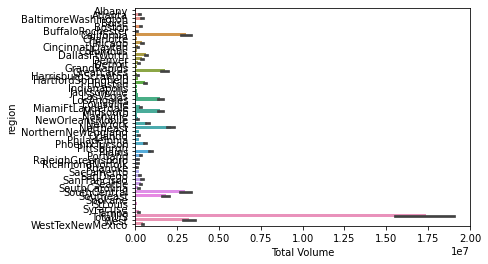

In [40]:
sns.barplot(y="region", x="Total Volume", data=ds)

observations: there are diffrent total volume in diff regions

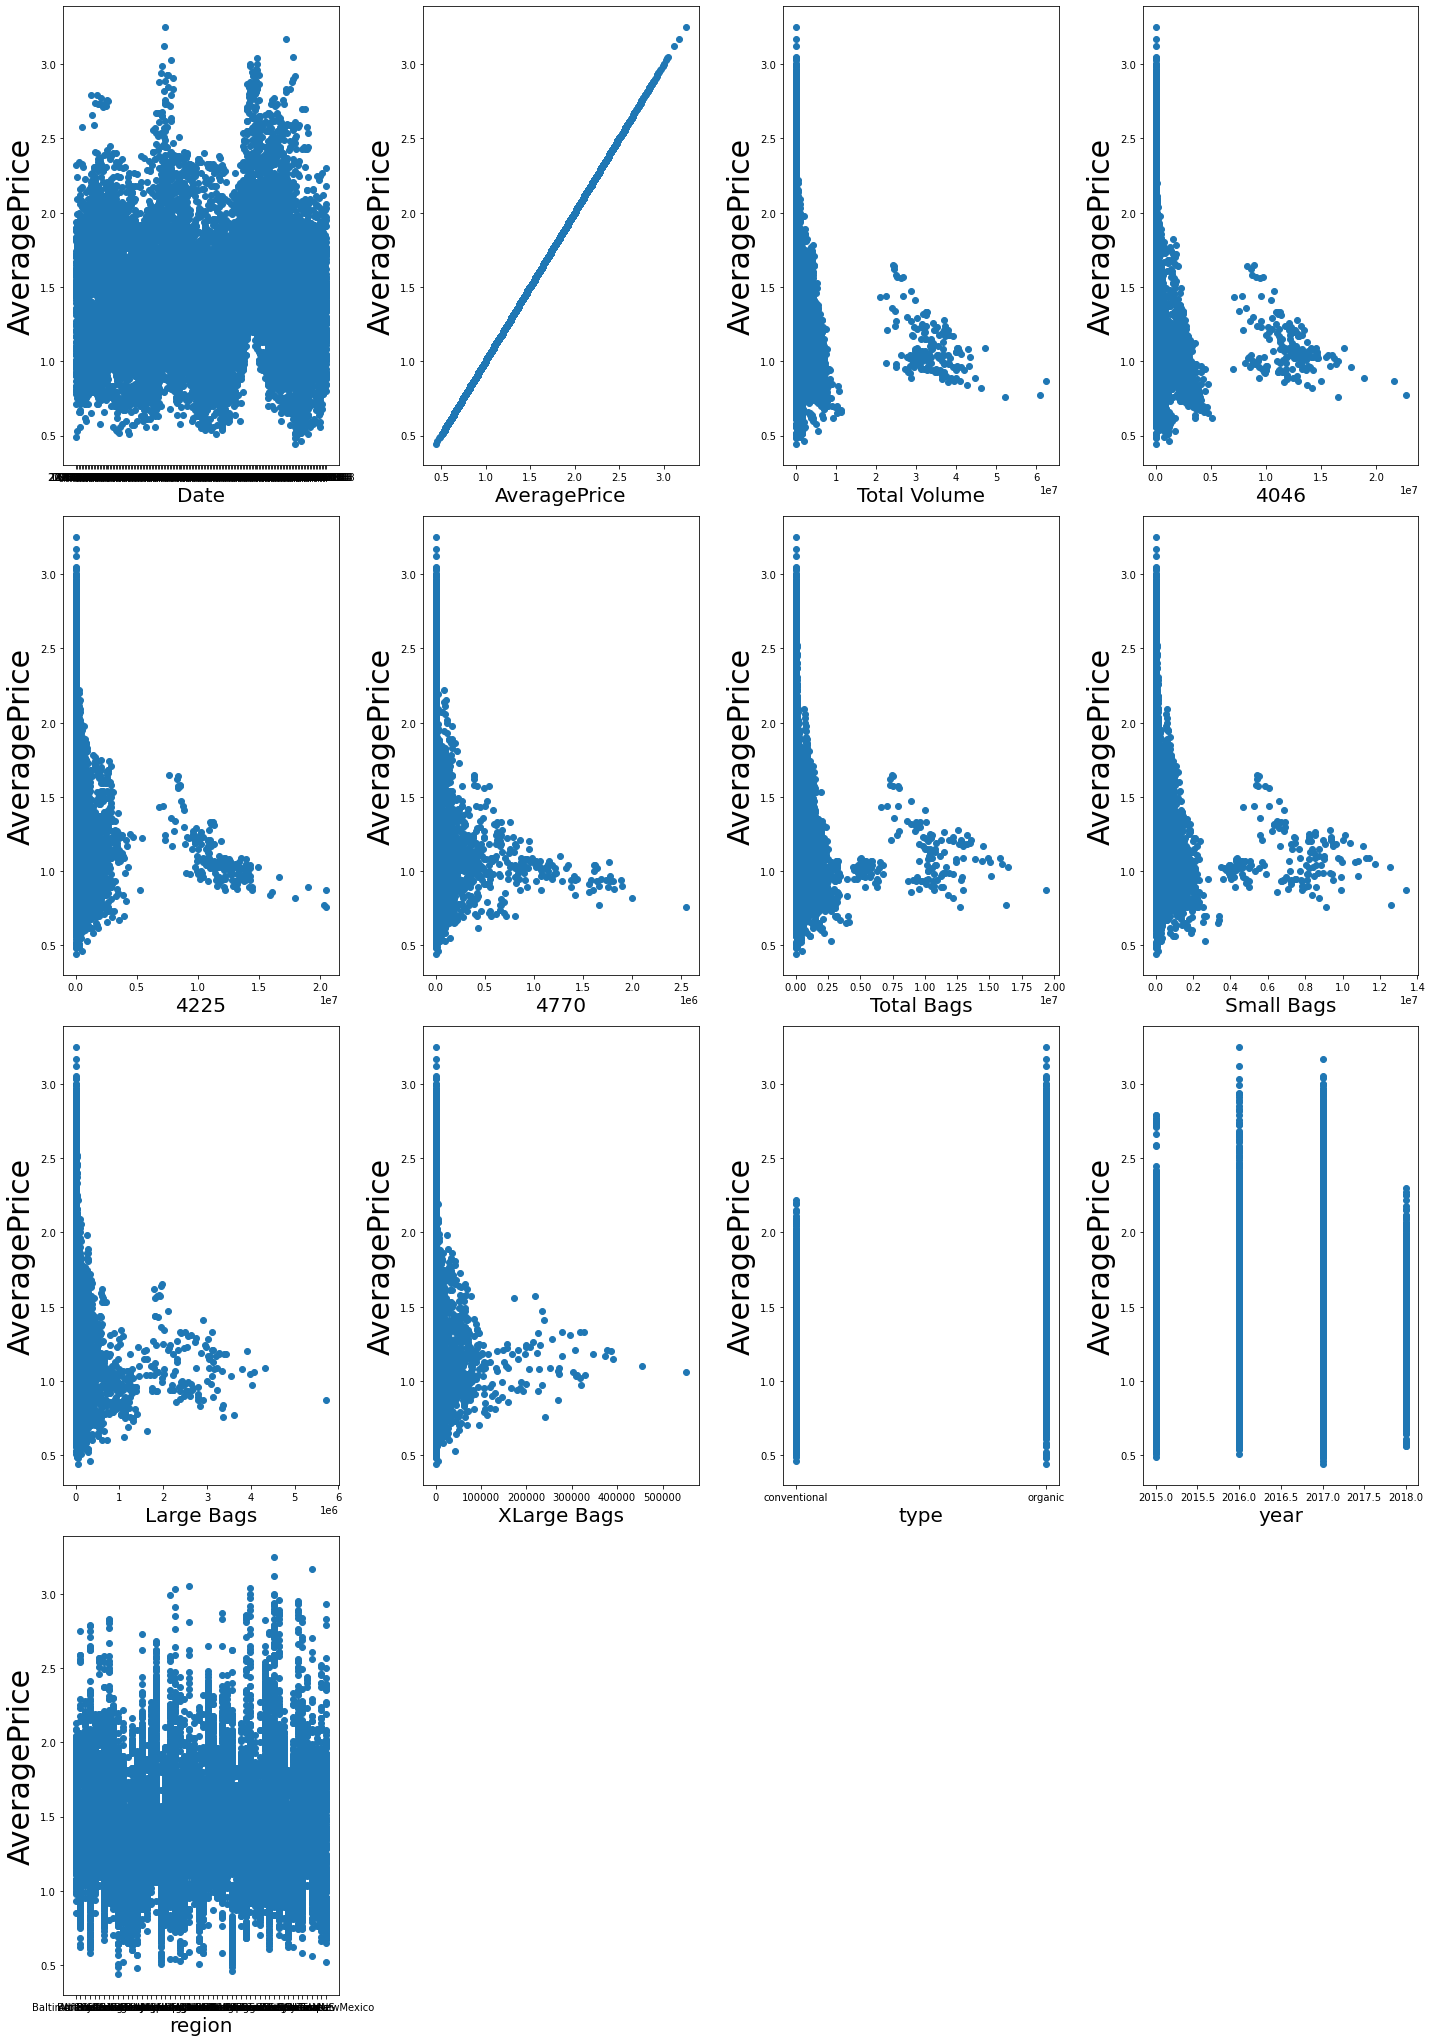

In [41]:
#scatter plot
columns1 =['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']
plt.figure(figsize=(20,35),facecolor='white')
p=1

for i in ds[columns1]:
    if p<=16:
        ax=plt.subplot(5,4,p)
        plt.scatter(x=ds[i], y="AveragePrice", data=ds)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=30)
        
    p+=1
plt.tight_layout()

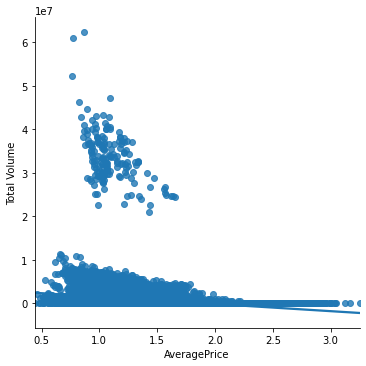

In [42]:
sns.lmplot(y="Total Volume",x="AveragePrice",data=ds)

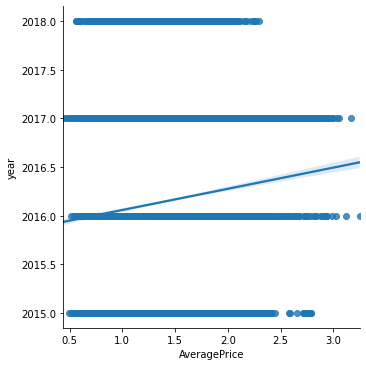

In [43]:
sns.lmplot(y="year",x="AveragePrice",data=ds)

# (iii) Multivariate Analysis

<AxesSubplot:>

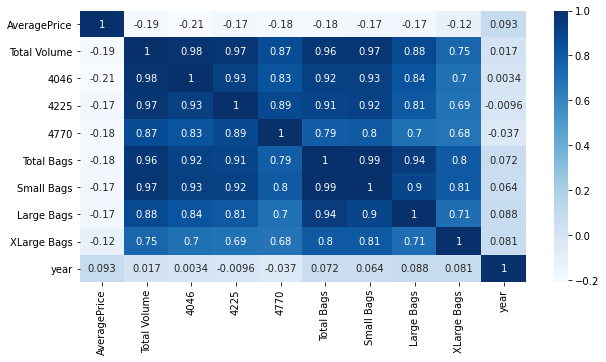

In [44]:
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(10,5))
hc=ds.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

observations:
    
    1. no correlation between AveragePrice and other parameters
    2. high correlation between total bags and small bags
    3. most of the parameters related to total volume

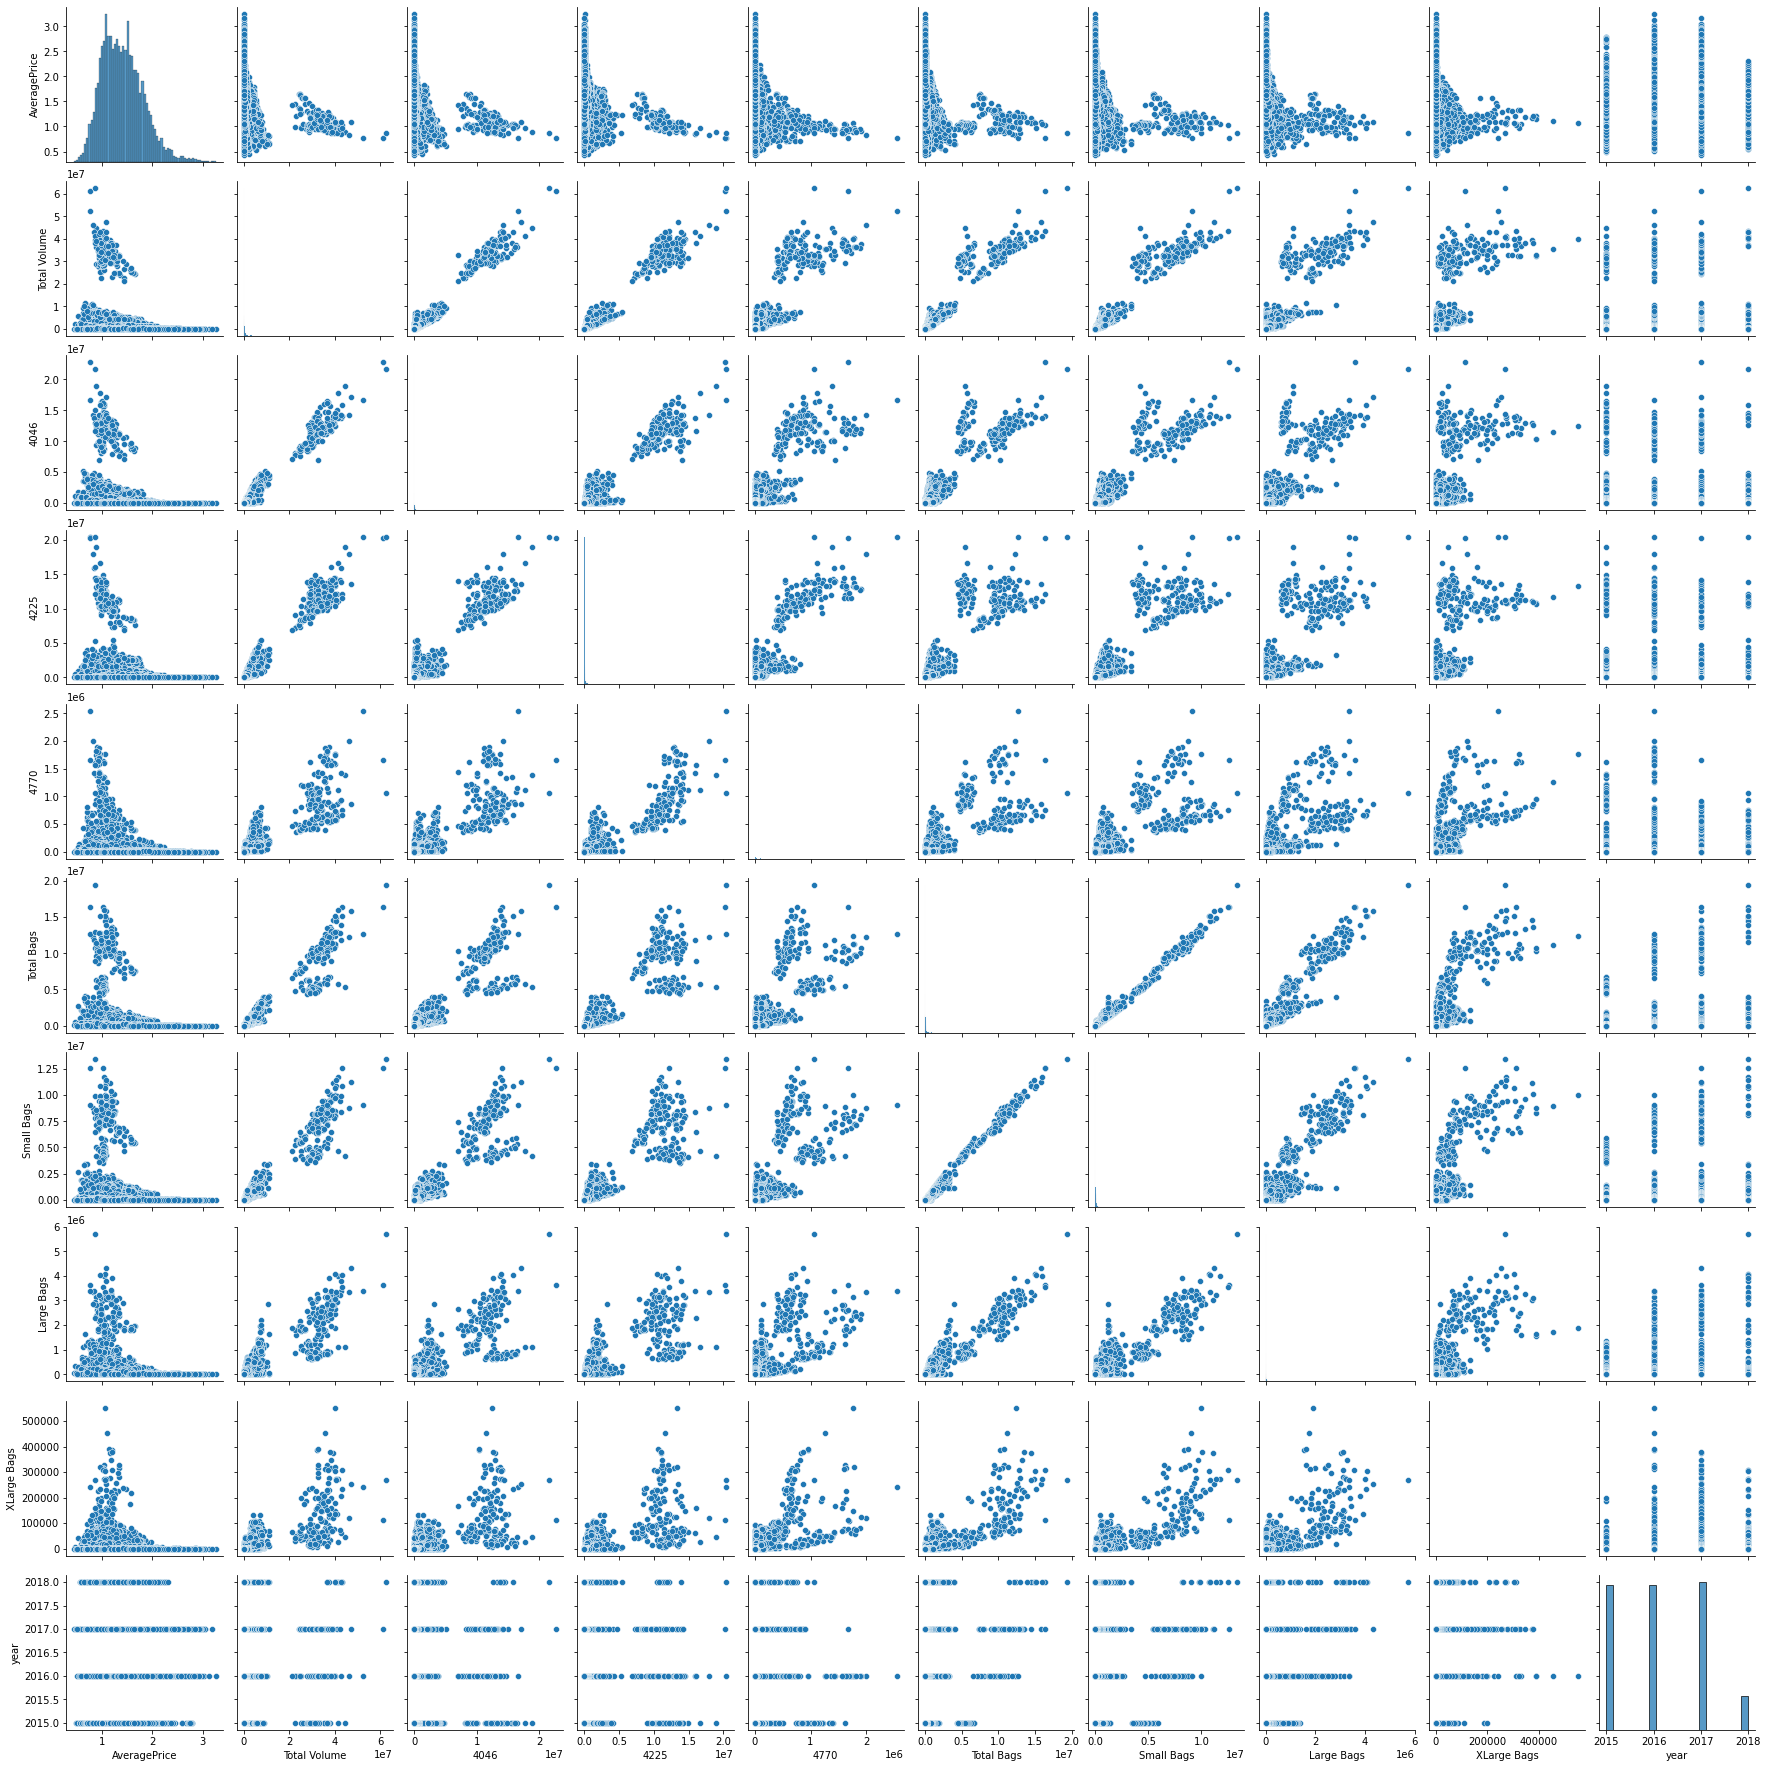

In [58]:
#showing pair plot in one frame
sns.pairplot(ds)

# Encoding

In [79]:
#label encoding .. to change object columns in int--> for mathmetical oprations
columns1=["region", "Date", "type"]
le=LabelEncoder()
for i in columns1:
    ds[i]=le.fit_transform(ds[i])

In [46]:
ds

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,72,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,33,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,151,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,112,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,73,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


# Removing outliers & Skew 

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

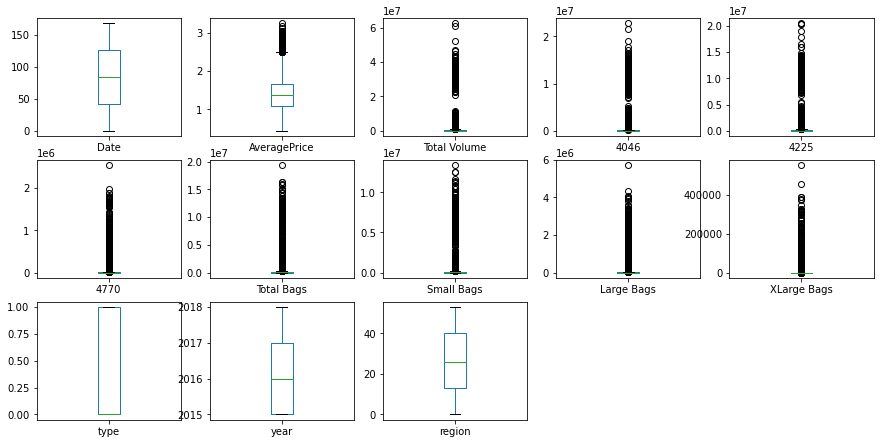

In [80]:
#box plot to observe outliers
ds.plot(kind="box",subplots = True, layout=(4,5),figsize =(15,10))

observation: most of the parameters having high outliers available

In [48]:
ds.keys()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [81]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [82]:
columns=["Date", 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']
for i in ds[columns]:
    lowScore, highScore= removeOutlier(ds[i])
    ds[i]=np.where(ds[i]>highScore,highScore,ds[i])
    ds[i]=np.where(ds[i]<lowScore,lowScore,ds[i])

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

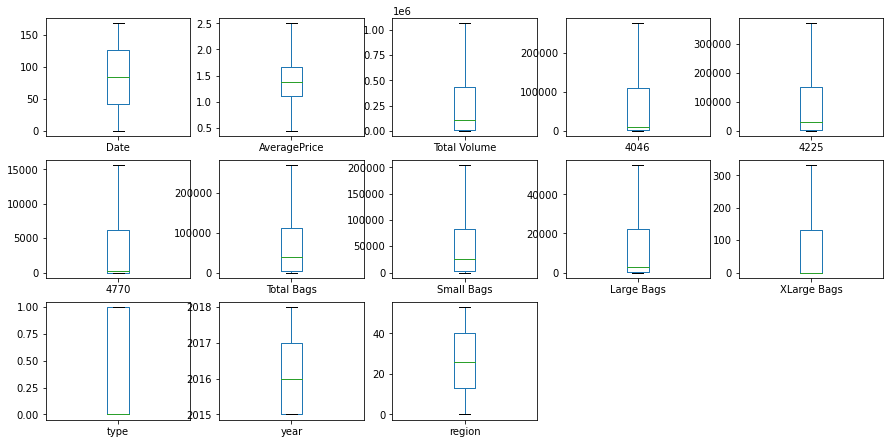

In [51]:
#box plot again
ds.plot(kind="box",subplots = True, layout=(4,5),figsize =(15,10))

observations: Outliers removed

In [52]:
ds.skew()

Date            0.000042
AveragePrice    0.453073
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
type            0.000329
year            0.215339
region          0.000030
dtype: float64

observations:skewness is stll present

In [83]:
#resolving skewness
columns= ('Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')
for i in columns:
    if ds.skew().loc[i]>0.5:
        ds[i]=np.log1p(ds[i])

In [84]:
ds.skew()

Date            0.000042
AveragePrice    0.453073
Total Volume   -0.286615
4046           -0.640200
4225           -0.811019
4770           -0.101183
Total Bags     -0.708210
Small Bags     -1.085408
Large Bags     -0.765295
XLarge Bags     0.868396
type            0.000329
year            0.215339
region          0.000030
dtype: float64

observations: now values are near to zero

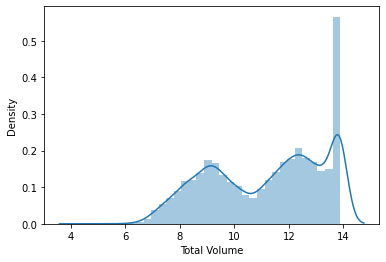

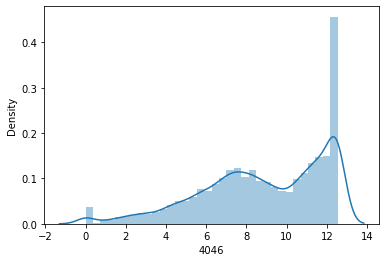

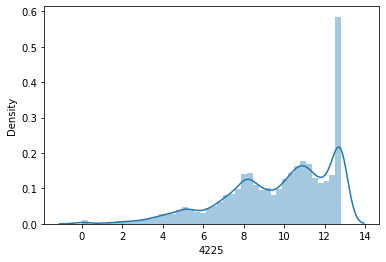

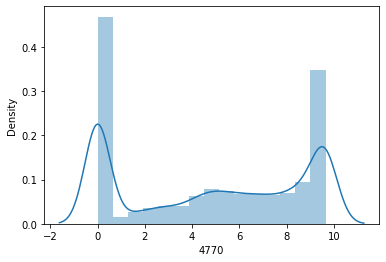

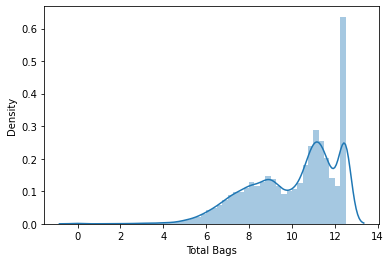

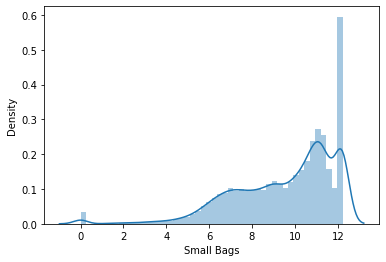

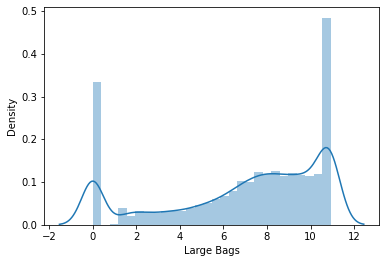

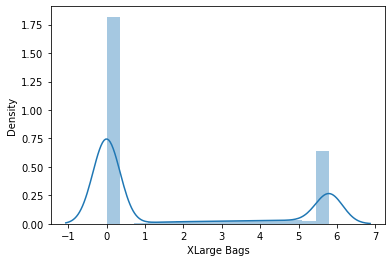

In [85]:
columns=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i],kde=True)

# Train and Test

In [86]:
x=ds.drop(columns=["AveragePrice"])
y=ds[["AveragePrice"]]

In [87]:
model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
max_r2_score = 0

for r_state in range (40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state, test_size =0.22)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state", r_state, "is", r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("max R2 score correspond to random state", final_state, "is", max_r2_score, "and model is", final_model)

R2 score correspond to random state 40 is 0.5083169068402108
R2 score correspond to random state 40 is 0.65302342209047
R2 score correspond to random state 40 is 0.48343266083887315
R2 score correspond to random state 40 is 0.49764476035651717
R2 score correspond to random state 40 is 0.6794557832048187
R2 score correspond to random state 41 is 0.5305278929762063
R2 score correspond to random state 41 is 0.6762816743119549
R2 score correspond to random state 41 is 0.5146761827961632
R2 score correspond to random state 41 is 0.5210137431868176
R2 score correspond to random state 41 is 0.6949738692519416
R2 score correspond to random state 42 is 0.5045255751300548
R2 score correspond to random state 42 is 0.6653117451894484
R2 score correspond to random state 42 is 0.47477289490249397
R2 score correspond to random state 42 is 0.48707227548119425
R2 score correspond to random state 42 is 0.6735811109419572
R2 score correspond to random state 43 is 0.5313756403789223
R2 score correspond to

In [88]:
#Checking the best parameter for prediction of GradientBoostingRegressor Also using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 50, test_size =0.22)
GB= GradientBoostingRegressor()
parameters= {"n_estimators" : range(20,81,10)}
gridsearch=GridSearchCV(GB,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_estimators': 80}

In [89]:
GBB=GradientBoostingRegressor(n_estimators=80)
GBB.fit(train_x,train_y)
pred=GBB.predict(test_x)
r2_sc= r2_score(test_y,pred)
print("R2 Score :", r2_sc*100)

R2 Score : 68.8902249219869


In [90]:
print("Mean Absolute Error:", mean_absolute_error(test_y,pred))
print("Mean squared Error:", mean_squared_error(test_y,pred))
print("Root Mean Absolute Error:", np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error: 0.171519725860574
Mean squared Error: 0.05012152963222595
Root Mean Absolute Error: 0.4141494004107383


In [91]:
#cross validation

score=cross_val_score(GBB, x, y, cv=5)
print(score)
print(score.mean())

[0.23692654 0.36026452 0.56402186 0.28943181 0.08523983]
0.3071769112249545


Text(0, 0.5, 'Predicted_Y')

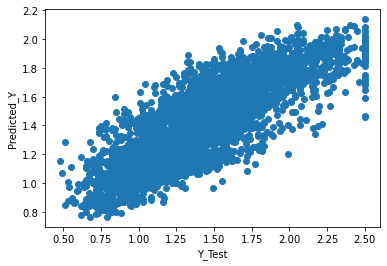

In [92]:
#checking the diffrence between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel("Y_Test")
plt.ylabel("Predicted_Y")

# Saving the model

In [93]:
joblib.dump(GBB,"Avacado.obj")

['Avacado.obj']

In [94]:
abalonefile=joblib.load("Avacado.obj")
abalonefile.predict(train_x)

array([1.84082053, 1.62715242, 1.10927918, ..., 1.6608785 , 0.85122166,
       1.28616002])